In [500]:
import pandas as pd

In [501]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [503]:
X = data.drop("Sales" , axis =1) # dropping column
y = data["Sales"]

In [506]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [507]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [508]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=123, test_size = .20)

In [509]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [510]:
lr.fit(X_train,y_train)

LinearRegression()

In [511]:
y_pred_train = lr.predict(X_train)

In [512]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [513]:
r2_score(y_train,y_pred_train)

0.8973234846678751

In [522]:
mean_absolute_error(y_train,y_pred_train)

1.2321616398329005

In [524]:
y_pred_test = lr.predict(X_test)
print(r2_score(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))

0.9180169996276659
1.2707307309230793


In [526]:
X.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [528]:
# Every column ranges differently. 


# Normalization 
**Normalization** in data science and machine learning refers to the process of **scaling numerical data** so that it falls within a specific range, typically **0 to 1**. This helps algorithms perform better and converge faster, especially when different features (columns) have different units or scales.

---

### 🔹 Why Normalize?

* Prevents features with larger ranges (e.g., income in thousands vs. age in years) from dominating the learning process.
* Improves performance of algorithms like:

  * KNN
  * Logistic Regression
  * Neural Networks
  * Gradient Descent-based models

---

### 🔹 Common Normalization Techniques:

1. **Min-Max Normalization**

   $$
   X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
   $$

   * Scales data to a **\[0, 1]** range.

2. **Z-score Standardization (StandardScaler)**

   $$
   Z = \frac{X - \mu}{\sigma}
   $$

   * Mean becomes 0, standard deviation becomes 1.
   * Not technically normalization, but often grouped with it.

---

### 🔹 Example:

Suppose we have this data for "Age":

```
[18, 22, 30, 50]
```

Using Min-Max:

$$
\text{Normalized Age} = \frac{Age - 18}{50 - 18}
\Rightarrow [0, 0.125, 0.375, 1]
$$

---

Let me know if you want to see normalization implemented in Python using `sklearn`. [Here's a deeper dive with code examples](dr) if you're interested.


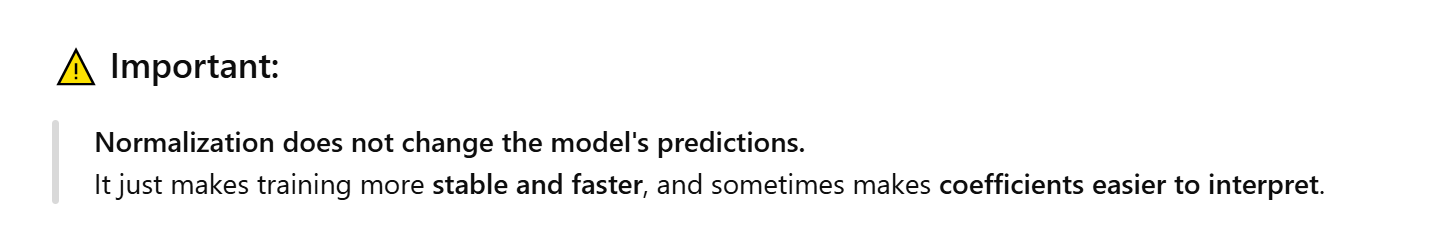

Great — let’s clarify **which normalization or standardization method to use and when**.

---

### 🔷 1. **Min-Max Normalization**

$$
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

**Use when:**

* You want data in a fixed **\[0, 1]** range.
* Your algorithm **assumes bounded input**, like:

  * Neural Networks (especially with sigmoid/tanh)
  * KNN
  * K-Means
* The data has **no outliers** (because min and max are sensitive to them).

---

### 🔷 2. **Z-Score Standardization (StandardScaler)**

$$
X' = \frac{X - \mu}{\sigma}
$$

**Use when:**

* Your data has **outliers** (mean ± std is less affected).
* You don’t need a fixed range but want **normalized variance**.
* You’re using:

  * Linear Regression (with gradient descent)
  * Logistic Regression
  * SVM
  * PCA
  * Any model that assumes **Gaussian distribution** or uses **distance/angles**

---

### 🔷 3. **Robust Scaling**

$$
X' = \frac{X - \text{median}}{\text{IQR}}
$$

**Use when:**

* Your data contains **strong outliers**
* You want to preserve **relative rankings** but reduce the effect of extremes

---

### 🔷 4. **When NOT to Normalize**

* For **tree-based models** (like Decision Trees, Random Forests, XGBoost), **normalization is not needed**, as they are **scale-invariant**.
* If using **ordinary least squares (OLS)** with just **one feature**, you **can skip it**.

---

### 🔍 Summary Table:

| Technique                | Use When                                                     | Sensitive to Outliers? | Output Range |
| ------------------------ | ------------------------------------------------------------ | ---------------------- | ------------ |
| Min-Max Scaling          | Features on different scales, bounded data, no outliers      | Yes                    | \[0, 1]      |
| Z-score (StandardScaler) | Most common; assumes normal distribution, good with outliers | No                     | Unbounded    |
| Robust Scaler            | Data has outliers; rank-based scaling                        | No                     | Unbounded    |
| No Scaling               | Tree models, or simple regression with few features          | —                      | —            |

---

Let me know what model or dataset you're working with, and I can recommend the best method. Or we can [do a deeper comparison with visuals](dr).


You're absolutely right — **normalization (min-max scaling)** **does** change both the **mean and variance** of the dataset.

But you're probably asking:

> “Even after normalization, why doesn't it preserve mean or variance like Z-score standardization?”

Let’s make that very clear with a side-by-side breakdown:

---

### 🔷 1. **Min-Max Normalization**

$$
X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

* ✅ Scales data to **\[0, 1]**
* ❌ Does **not** preserve:

  * Mean
  * Variance
* ❌ Mean and std. dev. depend entirely on original min and max, not on data distribution

👉 **Result:** After scaling, **mean ≠ 0**, **variance ≠ 1** — they are just whatever fits within the new bounds.

---

### 🔷 2. **Z-score Standardization**

$$
X' = \frac{X - \mu}{\sigma}
$$

* ✅ Mean becomes **0**
* ✅ Standard deviation becomes **1**
* ✅ Works well even if data is skewed or has outliers

👉 **Result:** This is the method that **preserves distribution shape** better and gives centered data with unit variance.

---

### 🔢 Quick Example:

Original Data:

```
X = [10, 20, 30, 40, 50]
Mean = 30
Std Dev ≈ 15.81
```

**Min-Max Scaling** → `[0, 0.25, 0.5, 0.75, 1]`

* Mean ≈ **0.5**
* Variance ≈ **0.0625**

**Z-score Standardization** → `[-1.26, -0.63, 0, 0.63, 1.26]`

* Mean ≈ **0**
* Variance ≈ **1**

---

### ✅ Summary:

| Method                  | Changes Mean? | Changes Variance? | Output Range | When to Use                  |
| ----------------------- | ------------- | ----------------- | ------------ | ---------------------------- |
| Min-Max Normalization   | ✅ Yes         | ✅ Yes             | \[0, 1]      | When bounded input is needed |
| Z-score Standardization | ✅ Yes → 0     | ✅ Yes → 1         | Unbounded    | When you need unit variance  |

---

Let me know if you want a Jupyter notebook-ready code example comparing both! Or I can [generate a chart showing the change visually](dr).


# MinMax Scaling

In [535]:
from sklearn.preprocessing import MinMaxScaler

In [537]:
Scaler = MinMaxScaler()

In [539]:
Scaled = Scaler.fit_transform(X)

In [541]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [543]:
cols = Scaler.feature_names_in_

In [545]:
df = pd.DataFrame(data = Scaled , columns = cols)

In [547]:
df

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994
...,...,...,...
195,0.126818,0.074597,0.118734
196,0.316199,0.098790,0.068602
197,0.596212,0.187500,0.053650
198,0.956713,0.846774,0.579595


In [549]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [551]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test =  train_test_split(df, y, random_state=123, test_size = .20)

df_train

,TV,Radio,Newspaper
24,0.208319,0.254032,0.158311
150,0.946906,0.280242,0.322779
114,0.262090,0.943548,0.300792
33,0.895840,0.403226,0.000000
23,0.769699,0.340726,0.227792
...,...,...,...
17,0.949273,0.798387,0.488127
98,0.977342,0.852823,0.447669
66,0.104160,0.495968,0.016711
126,0.024011,0.784274,0.442392


In [553]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(df_train,y_train)



LinearRegression()

In [555]:
y_pred_train = lr.predict(df_train)
r2_score(y_train,y_pred_train)

0.8973234846678751

In [557]:
mean_absolute_error(y_train,y_pred_train)

1.2321616398328998

In [559]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_test
})
print(comparison_df)

    Actual  Predicted
0     16.4  15.763488
1     11.9   8.985585
2     14.7  13.923090
3     10.1   9.804453
4     14.6  15.130330
5     20.7  21.123094
6     17.6  14.645956
7     21.2  19.401068
8     19.9  16.732959
9      7.3   9.207290
10    11.3  10.874662
11    22.6  20.480559
12     8.7   8.301117
13     6.7   6.955926
14     5.3   5.417689
15    11.9  12.595279
16    17.9  15.560780
17    16.8  19.818562
18     7.0   7.983963
19    18.0  19.371973
20     7.6   7.848553
21    12.9  12.136258
22     8.0   9.608725
23     8.4   8.587834
24    24.7  21.712605
25     8.8   9.601129
26    15.5  13.376034
27    15.0  15.462484
28    12.3  11.420784
29    22.6  20.740755
30    11.0  11.732266
31    22.2  22.058589
32    26.2  24.722847
33     6.6   7.405719
34    20.2  17.034455
35    19.6  20.058375
36    17.6  20.595747
37    20.7  19.265860
38    16.9  16.815911
39    10.9  10.417891


# Z-Score Standardization

In [472]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [474]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data = scaler.fit_transform(data)

# Print the results
print("Original X:\n", data)



Original X:
 [[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.32231867e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01 -8.97514665e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00 -5.93947713e-01]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  2.59834337e-01]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00  5.25455420e-01]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00 -1.50464857e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01 -6.31893582e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01 -3.66272500e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00 -1.95999899e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01  8.90779273e-02]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01 -4.80110107e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00  4.30590748e-01]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00 -1.12518988e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00 -2.71407828e-01]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01

In [476]:
cols = scaler.feature_names_in_
data = pd.DataFrame(data = data , columns = cols)
data

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.428757
196,-0.617035,-1.240003,-1.033598,-0.214489
197,0.349810,-0.942899,-1.111852,-0.062706
198,1.594565,1.265121,1.640850,1.967398


In [478]:
correlation_matrix = data.corr()

# Display it
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [480]:
data

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.428757
196,-0.617035,-1.240003,-1.033598,-0.214489
197,0.349810,-0.942899,-1.111852,-0.062706
198,1.594565,1.265121,1.640850,1.967398


In [482]:
x= data.drop("Sales" , axis =1) # dropping column
y= data["Sales"]
y

0      1.322319
1     -0.897515
2     -0.593948
3      0.259834
4      0.525455
         ...   
195   -1.428757
196   -0.214489
197   -0.062706
198    1.967398
199    0.620320
Name: Sales, Length: 200, dtype: float64

In [484]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state=123, test_size = .20)

print(y_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

50     0.240861
127   -0.612921
37    -0.081678
149   -0.954433
19    -0.100651
104    1.056698
179    0.468537
53     1.151562
162    0.904914
158   -1.485676
82    -0.726758
185    1.417183
182   -1.220055
189   -1.599513
108   -1.865134
31    -0.612921
4      0.525455
178    0.316753
121   -1.542594
20     0.544428
172   -1.428757
88    -0.423191
166   -1.352865
170   -1.276973
128    1.815615
72    -1.201082
180    0.070105
26    -0.024760
144   -0.537029
52     1.417183
79    -0.783677
93     1.341292
183    2.100209
119   -1.618486
85     0.961833
133    0.847995
184    0.468537
139    1.056698
95     0.335726
140   -0.802650
Name: Sales, dtype: float64


LinearRegression()

In [486]:
y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.8973234846678751

In [488]:
mean_absolute_error(y_train,y_pred_train)

0.2337772204177305

In [490]:
y_pred_test = lr.predict(x_test)
print(y_pred_test)
r2_score(y_test,y_pred_test)

[ 1.20096334e-01 -1.16587068e+00 -2.29081135e-01 -1.01050732e+00
 -3.22693494e-05  1.13697100e+00 -9.19322168e-02  8.10252025e-01
  3.04033498e-01 -1.12380681e+00 -8.07457272e-01  1.01506328e+00
 -1.29573427e+00 -1.55095660e+00 -1.84280526e+00 -4.81005759e-01
  8.16367633e-02  8.89462869e-01 -1.35590784e+00  8.04731953e-01
 -1.38159905e+00 -5.68095508e-01 -1.04764279e+00 -1.24133574e+00
  1.24881848e+00 -1.04908393e+00 -3.32873694e-01  6.29870857e-02
 -7.03841956e-01  1.06442999e+00 -6.44744693e-01  1.31446186e+00
  1.81994964e+00 -1.46561761e+00  3.61236116e-01  9.34962566e-01
  1.03691764e+00  7.84599150e-01  3.19771981e-01 -8.94120169e-01]


0.9180169996276659

In [492]:
import seaborn as sns

<Axes: xlabel='Sales'>

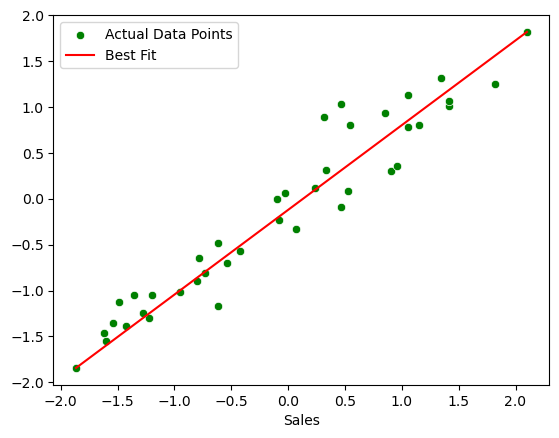

In [494]:
v

In [498]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_test
})
print(comparison_df)


      Actual  Predicted
0   0.240861   0.120096
1  -0.612921  -1.165871
2  -0.081678  -0.229081
3  -0.954433  -1.010507
4  -0.100651  -0.000032
5   1.056698   1.136971
6   0.468537  -0.091932
7   1.151562   0.810252
8   0.904914   0.304033
9  -1.485676  -1.123807
10 -0.726758  -0.807457
11  1.417183   1.015063
12 -1.220055  -1.295734
13 -1.599513  -1.550957
14 -1.865134  -1.842805
15 -0.612921  -0.481006
16  0.525455   0.081637
17  0.316753   0.889463
18 -1.542594  -1.355908
19  0.544428   0.804732
20 -1.428757  -1.381599
21 -0.423191  -0.568096
22 -1.352865  -1.047643
23 -1.276973  -1.241336
24  1.815615   1.248818
25 -1.201082  -1.049084
26  0.070105  -0.332874
27 -0.024760   0.062987
28 -0.537029  -0.703842
29  1.417183   1.064430
30 -0.783677  -0.644745
31  1.341292   1.314462
32  2.100209   1.819950
33 -1.618486  -1.465618
34  0.961833   0.361236
35  0.847995   0.934963
36  0.468537   1.036918
37  1.056698   0.784599
38  0.335726   0.319772
39 -0.802650  -0.894120


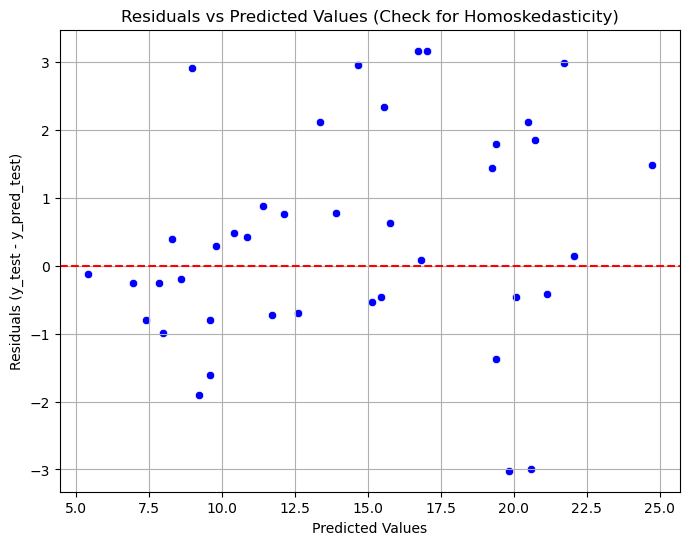

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate residuals
residuals = y_test - y_pred_test

# 2. Create scatter plot of predicted values vs residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_test, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # horizontal line at 0

# 3. Add labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred_test)")
plt.title("Residuals vs Predicted Values (Check for Homoskedasticity)")
plt.grid(True)
plt.show()


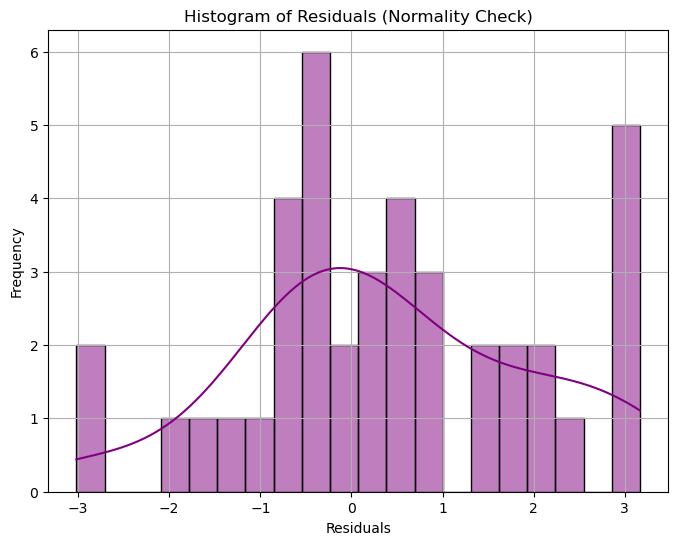

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_test

# Plot histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title("Histogram of Residuals (Normality Check)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


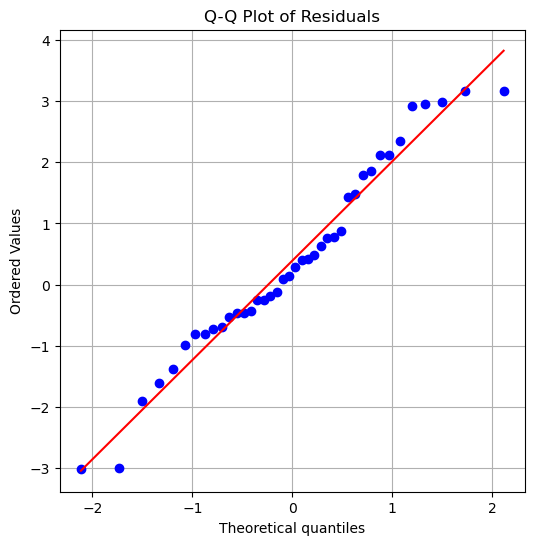

In [565]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


### ✅ **Essential Preprocessing Steps for Regression**

1. **Understand Data Structure** (`.info()`, `.describe()`)
2. **Handle Missing Values** (drop or impute)
3. **Encode Categorical Variables** (One-Hot or Label Encoding)
4. **Feature Scaling** (StandardScaler or MinMaxScaler)
5. **Outlier Detection and Treatment** (boxplot, z-score, IQR)
6. **Check for Multicollinearity** (correlation matrix, VIF)
7. **Feature Selection** (based on correlation, p-values, or importance)
8. **Train-Test Split** (e.g., 80/20 using `train_test_split`)
9. *(Optional)* **Polynomial Features** for non-linear relationships
10. **Check Model Assumptions After Fitting**:

    * Linearity
    * Homoscedasticity
    * Normality of residuals
    * No autocorrelation


